In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import common
import vcm
import fv3viz

In [2]:
group = "zc-emu-monthly-seed5-m06-30d-v1-offline"

In [3]:
data = common.open_group(group)

In [4]:
# Take meridional transects of ...
# gscond physics cloud
# precpd physics cloud
# precpd physics humidity

# Pick a a time with a good mix of convection and or frontal activity
# Transect over ocean

(<Figure size 432x288 with 1 Axes>,
 array(<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fcd64745100>,
       dtype=object),
 None)

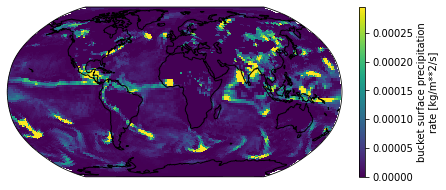

In [4]:
fv3viz.plot_cube(data.isel(time=16), "PRATEsfc")

In [5]:
data_pinterp = vcm.interpolate_to_pressure_levels(data, data["pressure_thickness_of_atmospheric_layer"], dim="z", levels=common.LEVELS)

In [6]:
data_3d_transect = common.meridional_transect(data_pinterp, 260)

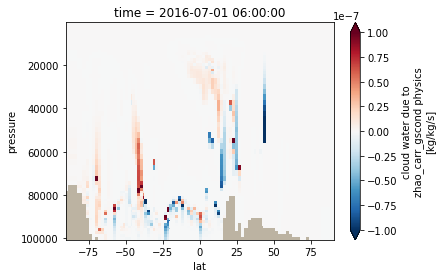

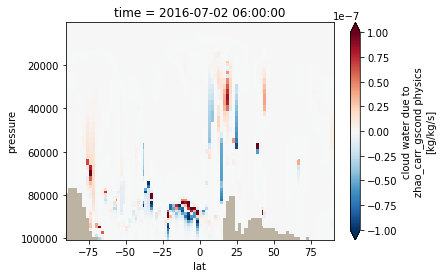

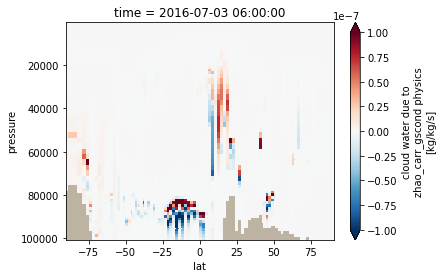

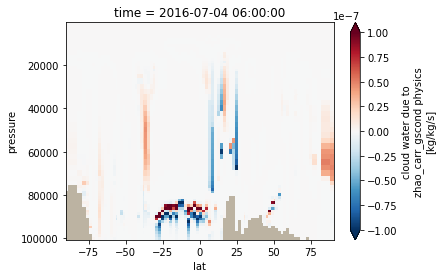

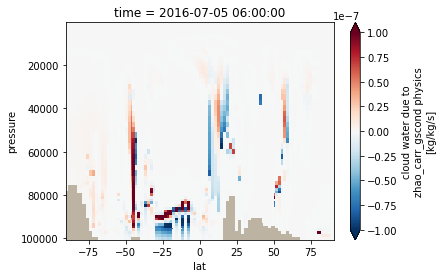

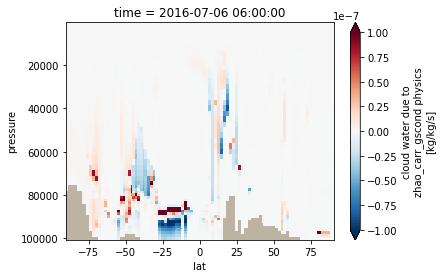

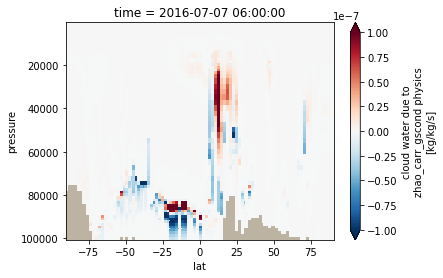

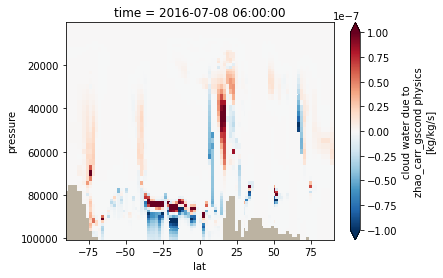

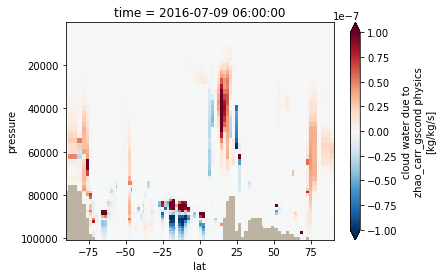

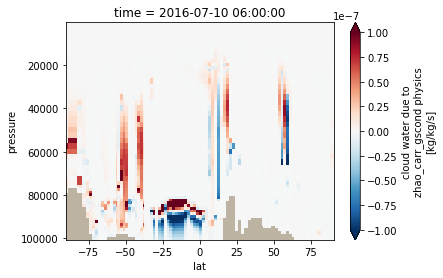

In [24]:
for i in range(10):
    data_3d_transect["tendency_of_cloud_water_due_to_gscond_physics"].isel(time=(i*8)+1).plot(vmin=-1e-7, vmax=1e-7, cmap="RdBu_r", yincrease=False)
    plt.show()

In [7]:
seconds_per_day = 60 * 60 * 24
g_per_kg = 1000

In [8]:
# select July 11 @ 6Z
for_plot = data_3d_transect.isel(time=57)


In [9]:
date = for_plot.time.values.item()

In [10]:
date.strftime(format='%Y-%m-%d %H:%M')

'2016-07-08 06:00'

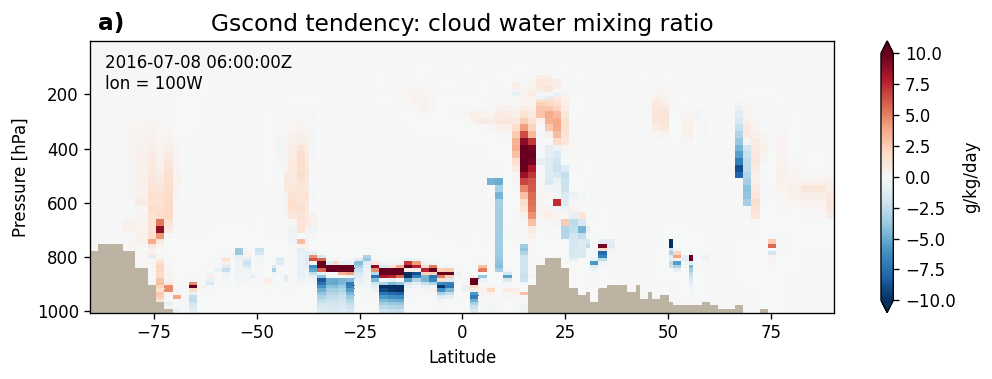

In [11]:
gscond_dcloud = for_plot["tendency_of_cloud_water_due_to_gscond_physics"] * g_per_kg * seconds_per_day
gscond_dcloud["pressure"] = gscond_dcloud["pressure"] / 100

fig, ax = plt.subplots(dpi=120, figsize=(10, 3))
gscond_dcloud.plot(vmin=-10, vmax=10, cmap=common.RdBu_LAND, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.text(0.01, 1.04, "a)", fontdict=dict(size=14, weight="bold"), transform=ax.transAxes)
plt.text(0.02, 0.95, f"{date.strftime()}Z\nlon = 100W", transform=ax.transAxes, va="top")
plt.title("Gscond tendency: cloud water mixing ratio", size=14)
common.savefig("gscond-transect-a")
plt.show()

In [17]:
from importlib import reload
reload(common)

<module 'common' from '/home/andrep/repos/fv3net/projects/microphysics/docs/manuscript/common.py'>

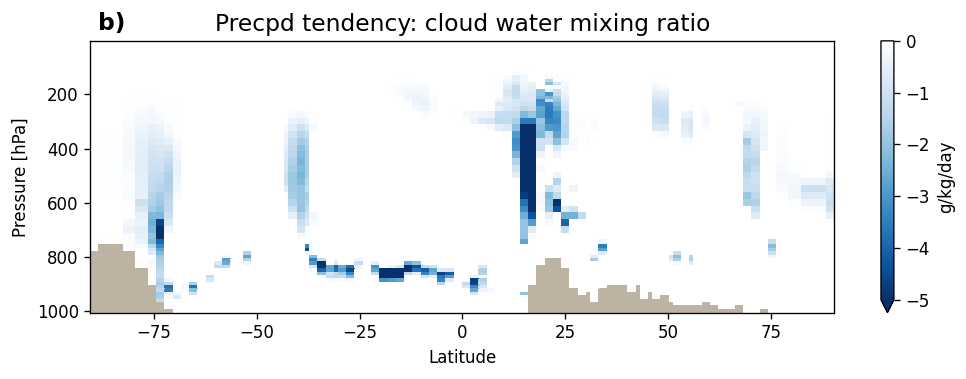

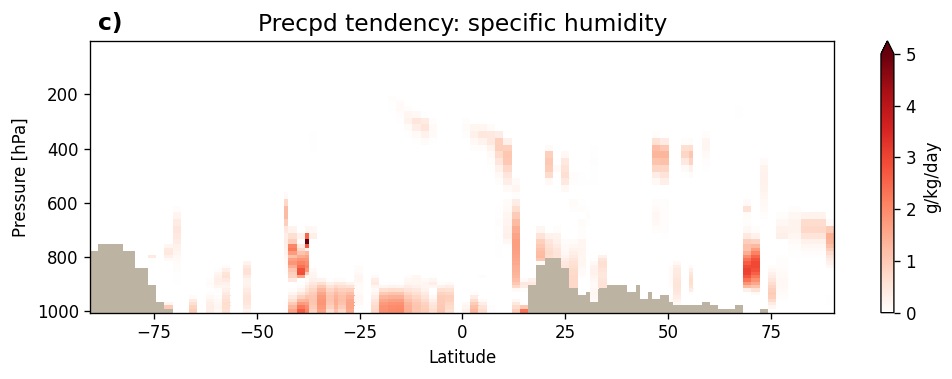

In [12]:
precpd_dcloud = for_plot["tendency_of_cloud_water_due_to_zhao_carr_physics"] - for_plot["tendency_of_cloud_water_due_to_gscond_physics"]
precpd_dcloud *= g_per_kg * seconds_per_day
precpd_dcloud["pressure"] = precpd_dcloud["pressure"] / 100

precpd_dhumidity = for_plot["tendency_of_specific_humidity_due_to_zhao_carr_physics"] - for_plot["tendency_of_specific_humidity_due_to_gscond_physics"]
precpd_dhumidity *= g_per_kg * seconds_per_day
precpd_dhumidity["pressure"] = precpd_dhumidity["pressure"] / 100

fig, ax = plt.subplots(dpi=120, figsize=(10, 3))
precpd_dcloud.plot(vmin=-5, vmax=0, cmap=common.NuBlues_LAND, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.title("Precpd tendency: cloud water mixing ratio", size=14)
plt.text(0.01, 1.04, "b)", fontdict=dict(size=14, weight="bold"), transform=ax.transAxes)
common.savefig("precpd-transect-b")
plt.show()

fig, ax = plt.subplots(dpi=120, figsize=(10, 3))
precpd_dhumidity.plot(vmin=0, vmax=5, cmap=common.NuReds_LAND, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.title("Precpd tendency: specific humidity", size=14)
plt.text(0.01, 1.04, "c)", fontdict=dict(size=14, weight="bold"), transform=ax.transAxes)
common.savefig("precpd-transect-c")
plt.show()